In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option("display.max_colwidth",200)
pd.options.display.float_format = '{:,.2f}'.format

<h1 align="center"> Previous Application Table </h1>

https://www.kaggle.com/code/jsaguiar/previous-app-eda-and-columns-description

https://www.kaggle.com/c/home-credit-default-risk/discussion/63032

### Mô tả dữ liệu:
- Dữ liệu gồm tất cả các đơn đăng ký vay Home Credit trước đây của các khách hàng đã vay trong kho dữ liệu của Home Credit cung cấp. 
- Mỗi dòng tương ứng cho một đơn đăng ký vay và khách hàng có thể nằm hoặc không trong tập dữ liệu đã báo cáo cho Phòng Tín Dụng

In [2]:
prev_app_df = pd.read_csv('Data/previous_application.csv')
prev_app_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,"1,730.43","17,145.00","17,145.00",0.00,"17,145.00",SATURDAY,15,Y,1,0.00,0.18,0.87,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00,middle,POS mobile with interest,"365,243.00",-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,"25,188.62","607,500.00","679,671.00",NaN,"607,500.00",THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00,low_action,Cash X-Sell: low,"365,243.00",-134.00,916.00,"365,243.00","365,243.00",1.00
2,2523466,122040,Cash loans,"15,060.74","112,500.00","136,444.50",NaN,"112,500.00",TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,high,Cash X-Sell: high,"365,243.00",-271.00,59.00,"365,243.00","365,243.00",1.00
3,2819243,176158,Cash loans,"47,041.33","450,000.00","470,790.00",NaN,"450,000.00",MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,middle,Cash X-Sell: middle,"365,243.00",-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,"31,924.40","337,500.00","404,055.00",NaN,"337,500.00",THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


# 1. Explode Data Analysis

## 1.1 Dữ liệu có bao nhiêu dòng và cột

In [3]:
print(f'Dữ liệu có {prev_app_df.shape[0]} dòng')
print(f'Dữ liệu có {prev_app_df.shape[1]} cột')

Dữ liệu có 1670214 dòng
Dữ liệu có 37 cột


## 1.2 Dữ liệu có bị trùng lặp không ?

In [4]:
prev_app_df.duplicated().sum()

0

## 1.3 Kiểu dữ liệu có gì bất thường không ?

In [5]:
prev_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

**Nhận xét**
- Dữ liệu chứa giá trị 'XNA' tương đương NaN
- Các thuộc tính còn lại không có gì bất thường về kiểu dữ liệu và giá trị.

### Tiền xử lý giá trị XNA và thống kê giá trị thiếu

In [6]:
# Số dòng có ít nhất 1 giá trị là XNA
print(f"Dữ liệu Rrevious Application có {(prev_app_df == 'XNA').any(axis = 1).sum()} dòng chứa giá trị XNA")

# Thay thế XNA bằng NaN
prev_app_df.replace('XNA', np.nan, inplace=True)

Dữ liệu Rrevious Application có 1670214 dòng chứa giá trị XNA


In [7]:
# thống kế số lượng giá trị thiếu của từng cột
def missing_value_table(df): 
    miss_val = df.isnull().sum()
        
    miss_val_percent = 100 * df.isnull().sum() / len(df)

    miss_val_table = pd.concat([miss_val, miss_val_percent], axis=1)

    miss_val_table.rename(columns = {0 : 'Missing Values', 
                                    1 : '% of Total Values'}, 
                         inplace=True)

    return miss_val_table

missing_value_stats = missing_value_table(prev_app_df)
sort_missing_value_stats = missing_value_stats.sort_values('Missing Values',ascending=False)

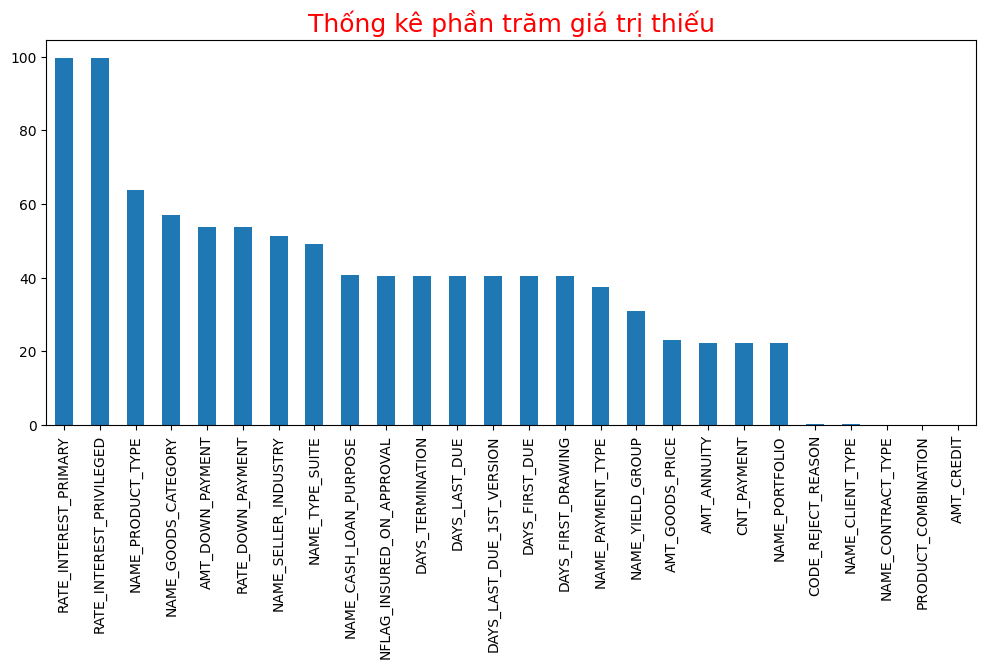

In [8]:
# trực quan hóa phần số lượng giá trị thiếu
plt.rcParams['figure.figsize'] = (12,5)
sort_missing_value_stats.loc[sort_missing_value_stats['% of Total Values'] > 0, '% of Total Values'].plot.bar()

plt.title("Thống kê phần trăm giá trị thiếu", fontsize = 18, color = 'r')

plt.show()

**Nhận xét**: Nhóm chia mức độ thiếu dữ liệu thành 3 nhóm và đề xuất phương pháp xử  lý cho từng nhóm:
- Các thuộc tính bị thiếu dữ liệu trên 99% như `RATE_INTEREST_PRIMARY` và `RATE_INTEREST_PRIVILEGED`  $\rightarrow$ nhóm sẽ xem xét xóa cột này.
- Các thuộc tính bị thiếu trên 50%  $\rightarrow$ nhóm sẽ dùng cái phương pháp thông kê để điền giá trị thiếu.
- Nhưng thuộc tính còn lại xấp xỉ 0% $\rightarrow$ nhóm sẽ xem xét bỏ những dòng mà giá trị này thiếu hoặc sẽ giữ nguyên.

**Nhóm sẽ phân tích kỹ hơn từng thuộc tính**

## 1.4 Phân tích thuộc tính category
**Note**: Phần tiếp theo nhóm chủ yếu phân tích để phát hiện những mâu thuẫn trong dữ liệu, mục đích cuối là hiểu rõ hơn về hành vi và thói quen của khách hàng để xử lý Time Series và chuẩn hóa dữ liệu hiệu quả ở giai đoạn sau.

In [9]:
category_prev_app_df = prev_app_df.select_dtypes('O')
category_prev_app_df.head(5)

,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,Consumer loans,SATURDAY,Y,XAP,Approved,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,NaN,Country-wide,Connectivity,middle,POS mobile with interest
1,Cash loans,THURSDAY,Y,NaN,Approved,NaN,XAP,Unaccompanied,Repeater,NaN,Cash,x-sell,Contact center,NaN,low_action,Cash X-Sell: low
2,Cash loans,TUESDAY,Y,NaN,Approved,Cash through the bank,XAP,"Spouse, partner",Repeater,NaN,Cash,x-sell,Credit and cash offices,NaN,high,Cash X-Sell: high
3,Cash loans,MONDAY,Y,NaN,Approved,Cash through the bank,XAP,NaN,Repeater,NaN,Cash,x-sell,Credit and cash offices,NaN,middle,Cash X-Sell: middle
4,Cash loans,THURSDAY,Y,Repairs,Refused,Cash through the bank,HC,NaN,Repeater,NaN,Cash,walk-in,Credit and cash offices,NaN,high,Cash Street: high


In [10]:
category_prev_app_df[category_prev_app_df['NAME_TYPE_SUITE'] == 'Spouse']

,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION


In [11]:
# thống kê giá trị từng cột
category_prev_app_df.agg([pd.Series.unique, pd.Series.nunique]).T

,unique,nunique
NAME_CONTRACT_TYPE,"[Consumer loans, Cash loans, Revolving loans, nan]",3
WEEKDAY_APPR_PROCESS_START,"[SATURDAY, THURSDAY, TUESDAY, MONDAY, FRIDAY, SUNDAY, WEDNESDAY]",7
FLAG_LAST_APPL_PER_CONTRACT,"[Y, N]",2
NAME_CASH_LOAN_PURPOSE,"[XAP, nan, Repairs, Everyday expenses, Car repairs, Building a house or an annex, Other, Journey, Purchase of electronic equipment, Medicine, Payments on other loans, Urgent needs, Buying a used c...",24
NAME_CONTRACT_STATUS,"[Approved, Refused, Canceled, Unused offer]",4
NAME_PAYMENT_TYPE,"[Cash through the bank, nan, Non-cash from your account, Cashless from the account of the employer]",3
CODE_REJECT_REASON,"[XAP, HC, LIMIT, CLIENT, SCOFR, SCO, nan, VERIF, SYSTEM]",8
NAME_TYPE_SUITE,"[nan, Unaccompanied, Spouse, partner, Family, Children, Other_B, Other_A, Group of people]",7
NAME_CLIENT_TYPE,"[Repeater, New, Refreshed, nan]",3
NAME_GOODS_CATEGORY,"[Mobile, nan, Consumer Electronics, Construction Materials, Auto Accessories, Photo / Cinema Equipment, Computers, Audio/Video, Medicine, Clothing and Accessories, Furniture, Sport and Leisure, Ho...",27


### 1.4.1 NAME_CONTRACT_TYPE vs NAME_CONTRACT_STATUS

**Mô tả dữ liệu**: 
- `NAME_CONTRACT_TYPE` có 3 giá trị chính:
    - Revolving loans (credit card): Người đi vay được cập một hạn mức tín dụng, người đó có thể chi tiêu/rút tiền với hạn mức tín dụng đó. Và cuối tháng thì ngân hàng sẽ thông báo khoản vay tối thiểu mà người đó phải trả.
    - Consumer loans (Point of Sale - POS): Người vay được cấp một hạn mức tín dụng để mua hàng hóa và sẽ phải hoàn trả khoản tín dụng đó hàng tháng, mỗi tháng cách nhau 30 ngày.
    - Cash loans: Người xin vay được cấp một khoản tiền mặt để có thể chi tiêu và sẽ cần hoàn trả khoản tín dụng đó hàng tháng, mỗi tháng cách nhau 30 ngày.
- `NAME_CONTRACT_STATUS`: 
    - Thể hiện trạng thái của hồ sơ như Approved hoặc Refused hoặc Canceled.
    - Trạng thái hồ sơ có thể là Unused offer nếu khách hàng chưa sử dụng tín dụng

Nguồn tham khảo: https://www.kaggle.com/c/home-credit-default-risk/discussion/63032

### Tỷ lệ phần trăm từng giá trị của contract type và contract status

In [12]:
name_contract_type_stats = category_prev_app_df['NAME_CONTRACT_TYPE'].value_counts(dropna=False)
name_contract_status_stats = category_prev_app_df['NAME_CONTRACT_STATUS'].value_counts(dropna=False)

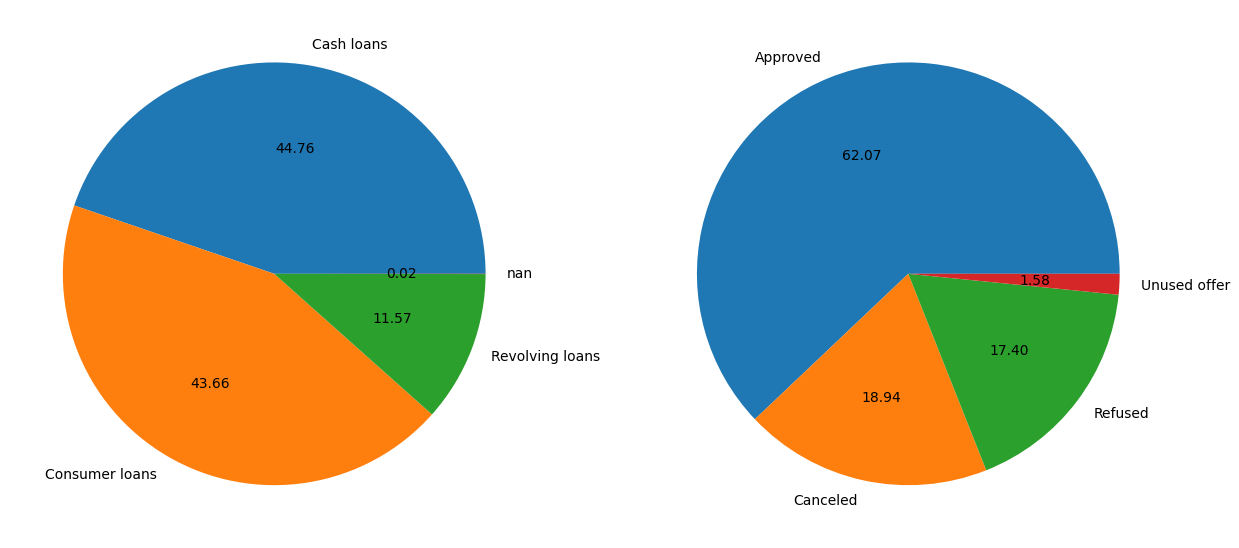

In [13]:
# Trực quan hóa
fig, ax = plt.subplots(1,2, figsize = (15,8))
ax[0].pie(name_contract_type_stats.values, labels=name_contract_type_stats.index, autopct='%.2f')
ax[1].pie(name_contract_status_stats.values, labels=name_contract_status_stats.index, autopct='%.2f');

**Nhận xét**:
- Loại hợp đồng chủ yếu là `Cash loan` và `Consumer loan`. Các khoản vay bị thiếu thông tin loại hợp đồng chiếm tỷ lệ nhỏ, không đáng kể.
- Hồ sơ có trạng thái `Approved` chiếm tỷ lệ cao nhất. `Unused offer` chiếm tỷ lệ không đáng kể.

### So sánh tỷ lệ của contract status theo contract type của khách hàng trong quá khứ

In [14]:
groupby_contract_df = category_prev_app_df.groupby(['NAME_CONTRACT_STATUS', 
                                                    'NAME_CONTRACT_TYPE'])[['NAME_CONTRACT_TYPE']].count()
groupby_contract_df.rename(columns={'NAME_CONTRACT_TYPE': 'COUNT'}, inplace=True)

In [15]:
# unstack NAME_CONTRACT_STATUS
groupby_contract_df = groupby_contract_df.unstack(level=1)['COUNT'].T
groupby_contract_df

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_CONTRACT_TYPE,,,,
Cash loans,312540,268591,165928,494
Consumer loans,626470,1559,75185,25937
Revolving loans,97771,45854,49534,5


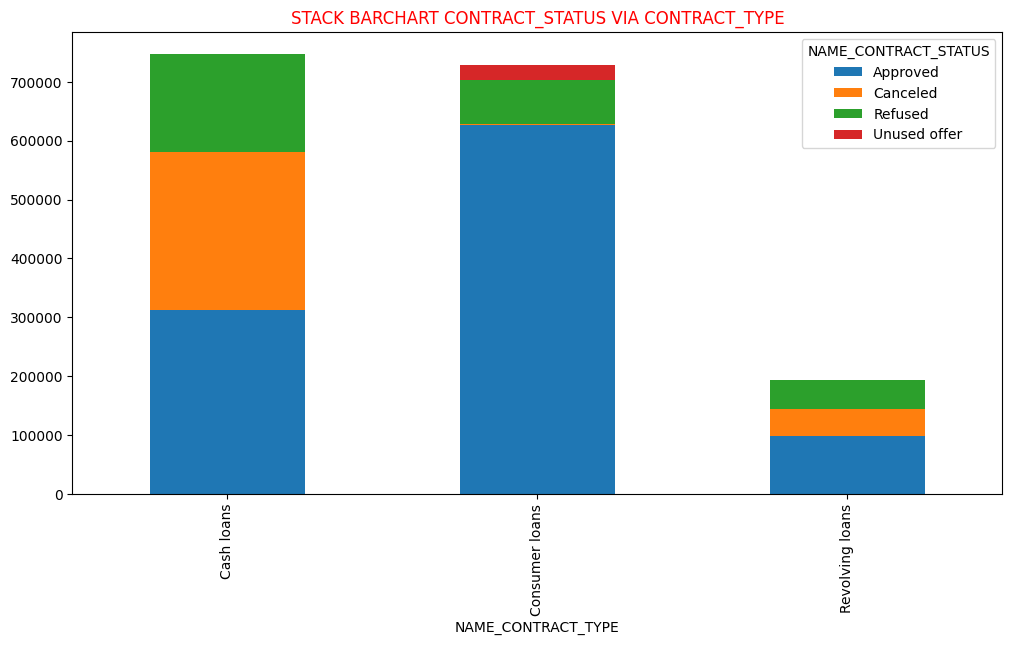

In [31]:
## Trực quan hóa
plt.rcParams['figure.figsize'] = (12,6)
groupby_contract_df.plot(kind='bar', stacked=True);
plt.title("STACK BARCHART CONTRACT_STATUS VIA CONTRACT_TYPE", fontsize=12 ,color='r');

**Nhận xét**:
- Qua stack barchart thì có cái nhìn chi tiết hơn, cụ thể:
    - Số lượng đơn `Approved` vẫn chiếm tỉ lệ cao, đặc biệt đối với `Consumer loans`.
    - Số lượng đơn `Refused` chủ yếu đến từ `Cash loans` là chính và đáng chú ý là `Cash loans` có số lượng đơn `Refused` và `Canceled` cao bất thường.
    - Số lượng `Unused offer` đa số đến từ `Comsumer loans`, có thể đây là đến từ thói quen của khách hàng.

### So sánh tỷ lệ target theo contract type và contract status

In [17]:
groupby_target_contract_df = category_prev_app_df.groupby(['NAME_CONTRACT_STATUS', 
                                                         'NAME_CONTRACT_TYPE',
                                                         'FLAG_LAST_APPL_PER_CONTRACT'])

In [18]:
groupby_target_contract_df = groupby_target_contract_df[['FLAG_LAST_APPL_PER_CONTRACT']].count()
groupby_target_contract_df.rename(columns={'FLAG_LAST_APPL_PER_CONTRACT': 'COUNT'}, inplace=True)

In [19]:
# unstack FLAG_LAST_APPL_PER_CONTRACT
groupby_target_contract_df = groupby_target_contract_df.unstack(level=2)                                                   

In [20]:
# unstack NAME_CONTRACT_STATUS
groupby_target_contract_df = groupby_target_contract_df['COUNT'].unstack(level=1).T
groupby_target_contract_df

NAME_CONTRACT_STATUS                             Approved   Canceled  \
FLAG_LAST_APPL_PER_CONTRACT NAME_CONTRACT_TYPE                         
N                           Cash loans                NaN        NaN   
                            Consumer loans            NaN        NaN   
                            Revolving loans           NaN       2.00   
Y                           Cash loans         312,540.00 268,591.00   
                            Consumer loans     626,470.00   1,559.00   
                            Revolving loans     97,771.00  45,852.00   

NAME_CONTRACT_STATUS                              Refused  Unused offer  
FLAG_LAST_APPL_PER_CONTRACT NAME_CONTRACT_TYPE                           
N                           Cash loans               4.00           NaN  
                            Consumer loans            NaN           NaN  
                            Revolving loans      8,469.00           NaN  
Y                           Cash loans         165,924.00        494.00  
                            Consumer loans      75,185.00     25,937.00  
                            Revolving loans     41,065.00          5.00

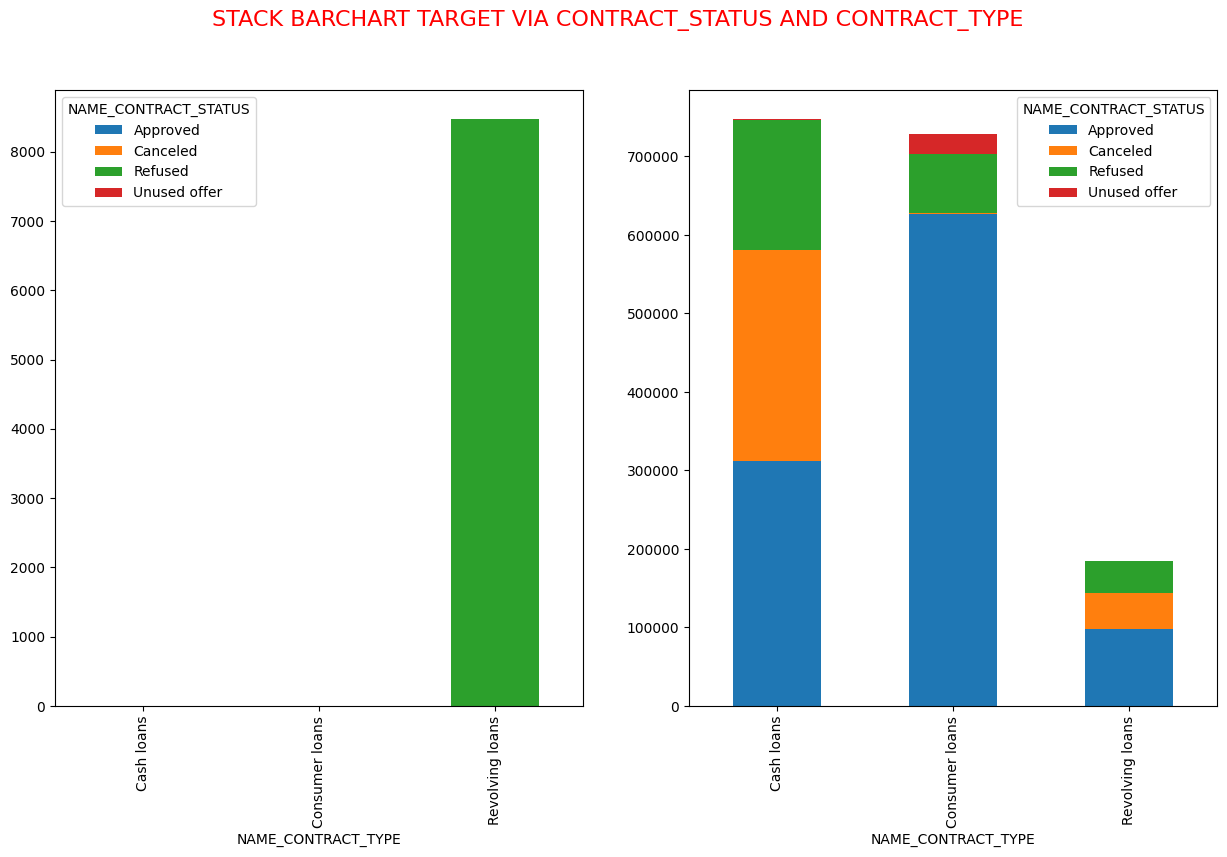

In [21]:
# Trực quan hóa target = No
fig, ax = plt.subplots(1,2, figsize = (15,8))
groupby_target_contract_df.loc['N'].plot(kind='bar', stacked=True ,ax = ax[0]);

# Trực quan hóa target = Yes
groupby_target_contract_df.loc['Y'].plot(kind='bar', stacked=True, ax=ax[1]);
plt.suptitle("STACK BARCHART TARGET VIA CONTRACT_STATUS AND CONTRACT_TYPE", fontsize=16,color='r');

**Nhận xét**: Kết hợp với stack barchart ở 2 phần trên thì có cái nhìn cụ thể hơn:
- Nhóm khách hàng không thanh toán đúng hạn đa số đăng ký `Revolving loans` và status là `Refused` $\rightarrow$ đây là sự một sự mâu thuẫn vì khách hàng đã được trả kết quả là `Refused` thì không nên thể hiện `TARGET` ở đây. 
- Còn lại phân bố theo nhóm khách hàng đúng hạn thì nhìn chung tương tự ở phần trước

### 1.4.2 WEEKDAY_APPR_PROCESS_START vs HOUR_APPR_PROCESS_START

**Mô tả dữ liệu**:
- `WEEKDAY_APPR_PROCESS_START`: Ngày nào trong tuần khách hàng bắt đầu quy trình đăng ký khoản vay.

- `HOUR_APPR_PROCESS_START`: Khoảng giờ bắt đầu quá trình đăng ký khoản vay.

In [22]:
weekday_app_stats = category_prev_app_df['WEEKDAY_APPR_PROCESS_START'].value_counts(dropna=False)
hour_app_stats = prev_app_df['HOUR_APPR_PROCESS_START'].value_counts(dropna=False).sort_index()

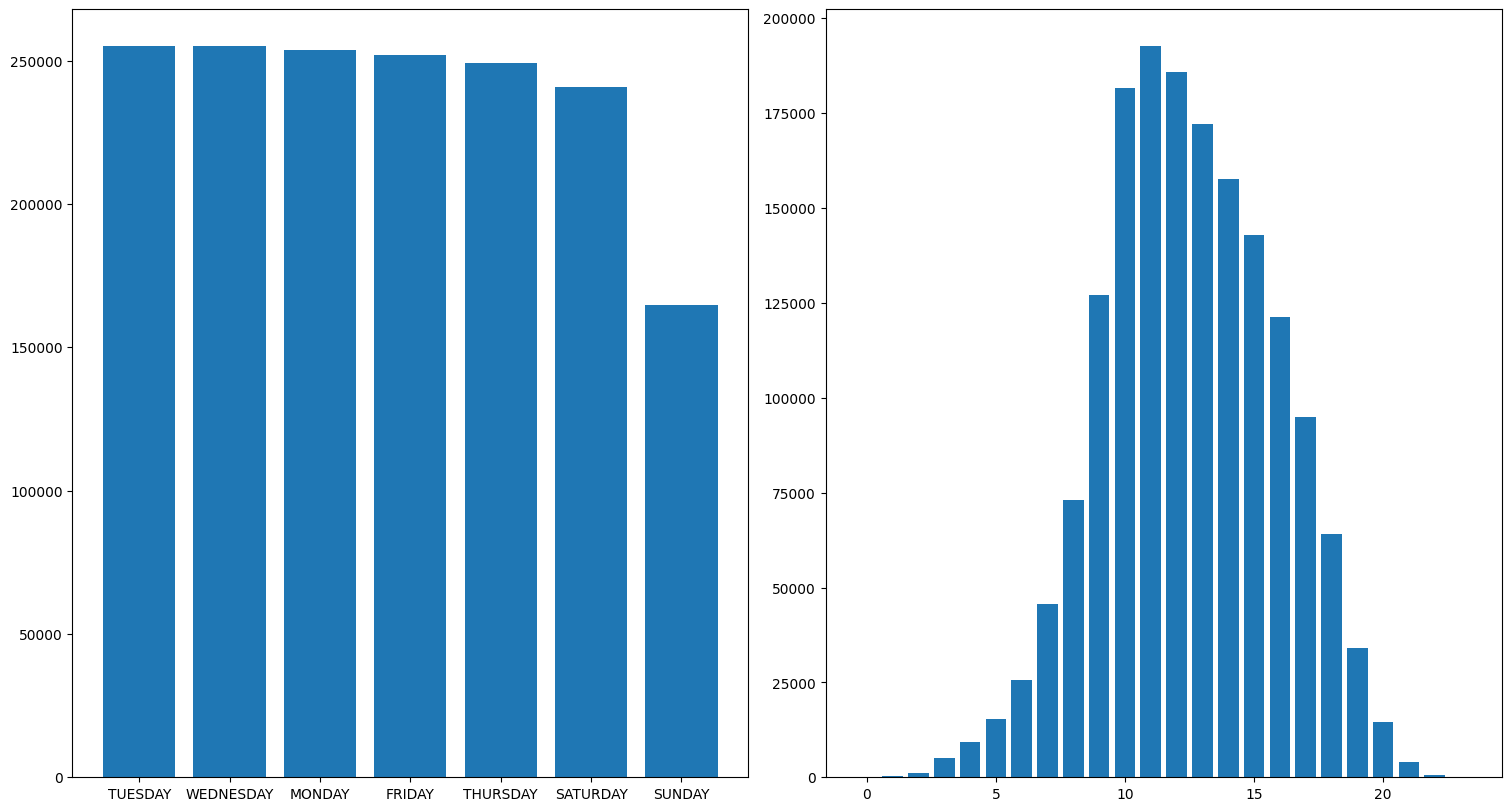

In [23]:
# Trực quan hóa
fig, ax = plt.subplots(1,2, figsize = (15,8), layout="constrained")
ax[0].bar(weekday_app_stats.index, height=weekday_app_stats.values)
ax[1].bar(hour_app_stats.index, height=hour_app_stats.values);

**Nhận xét**
- Khách hàng bắt đầu quy trình đăng ký khoản vay vào hầu hết các ngày trong tuần, chỉ riêng Chủ Nhật thì thấp hơn.
- Thời gian khách hàng bắt đầu thì tập trung chủ yếu vào khoảng thời gian từ 9h-17h

### 1.4.3 NAME_CASH_LOAN_PURPOSE 

**Nhận xét**:
- Xem xét trường thuộc tính `NAME_CASH_LOAN_PURPOSE` ngoài giá trị NaN thì có 2 values đáng để ý là `Refusal to name the goal` và `Payments on other loans`. 
- Nhóm sẽ thống kê dự trên `FLAG_LAST_APPL_PER_CONTRACT(TARGET), NAME_CONTRACT_STATUS` để xem có điều gì bất thường hay không ? Liệu rằng có xuất hiện cách thức vay vốn xoay vòng ở đây ?

In [24]:
obs_loan_purpose_df = category_prev_app_df[category_prev_app_df['NAME_CASH_LOAN_PURPOSE'].isin(['Refusal to name the goal',
                                                                                                'Payments on other loans'])]
groupby_obs_lpur_df = obs_loan_purpose_df[['FLAG_LAST_APPL_PER_CONTRACT', 
                                           'NAME_CONTRACT_STATUS', 
                                           'NAME_CASH_LOAN_PURPOSE']]
groupby_obs_lpur_df = groupby_obs_lpur_df.groupby(['FLAG_LAST_APPL_PER_CONTRACT', 
                                                   'NAME_CONTRACT_STATUS', 
                                                   'NAME_CASH_LOAN_PURPOSE'])

In [25]:
groupby_obs_lpur_df = groupby_obs_lpur_df[['FLAG_LAST_APPL_PER_CONTRACT']].count()
groupby_obs_lpur_df.rename(columns={'FLAG_LAST_APPL_PER_CONTRACT': 'COUNT'}, inplace=True)

In [26]:
# unstack FLAG_LAST_APPL_PER_CONTRACT
groupby_obs_lpur_df = groupby_obs_lpur_df.unstack(level=0)

In [27]:
# unstack NAME_CONTRACT_STATUS
groupby_obs_lpur_df = groupby_obs_lpur_df['COUNT'].unstack(level=1)['Y']
groupby_obs_lpur_df

NAME_CASH_LOAN_PURPOSE,Payments on other loans,Refusal to name the goal
NAME_CONTRACT_STATUS,,
Approved,304.00,4.00
Canceled,70.00,NaN
Refused,"1,553.00",11.00
Unused offer,4.00,NaN


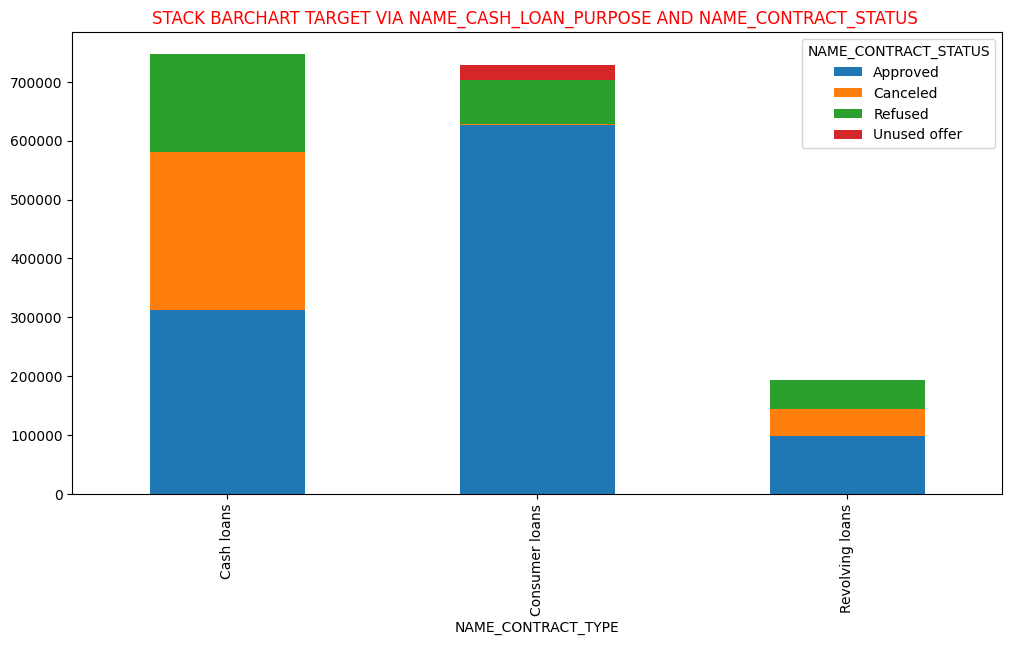

In [30]:
## Trực quan hóa
plt.rcParams['figure.figsize'] = (12,6)
groupby_contract_df.plot(kind='bar', stacked=True);
plt.title("STACK BARCHART TARGET VIA NAME_CASH_LOAN_PURPOSE AND NAME_CONTRACT_STATUS ", fontsize=12 ,color='r');

**Nhận xét**:
- Các khoản vay có mục đích là `Refusal to name the goal và Payments on other loans` thì đều thực hiện trả nợ đúng hạn và tỷ lệ phân bố `NAME_CONTRACT_STATUS` tương tự phần ở trên. $\rightarrow$ không phát hiện điểm bất thường hay gian lận của khách hàng ở đây.